### Importing the libraries


In [9]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
sns.set(rc={'figure.figsize':(15,7)})

In [4]:
data=pd.read_csv('saheart.dat',sep=',',header = 13, names = ['Sbp', 'Tobacco', 'Ldl', 'Adiposity',
                                                                'Famhist', 'Typea', 'Obesity', 'Alcohol', 'Age', 'Chd'])

### Data Cleaning

In [6]:
data.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [7]:
data.tail()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [8]:
data.sample(5)

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
195,138,0.00,1.96,11.82,Present,54,22.01,8.13,21,0
259,154,1.80,7.13,34.04,Present,52,35.51,39.36,44,0
396,162,7.00,7.67,34.34,Present,33,30.77,0.00,62,0
300,138,0.00,3.96,24.70,Present,53,23.80,0.00,45,0
377,118,1.25,4.69,31.58,Present,52,27.16,4.11,53,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sbp        462 non-null    int64  
 1   Tobacco    462 non-null    float64
 2   Ldl        462 non-null    float64
 3   Adiposity  462 non-null    float64
 4   Famhist    462 non-null    object 
 5   Typea      462 non-null    int64  
 6   Obesity    462 non-null    float64
 7   Alcohol    462 non-null    float64
 8   Age        462 non-null    int64  
 9   Chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [12]:
data['Chd'].value_counts()

0    302
1    160
Name: Chd, dtype: int64

In [14]:
data['Chd']=data['Chd'].astype('category')

In [17]:
data.isna().sum()

Sbp          0
Tobacco      0
Ldl          0
Adiposity    0
Famhist      0
Typea        0
Obesity      0
Alcohol      0
Age          0
Chd          0
dtype: int64

In [18]:
new_data=data.copy()

<AxesSubplot:>

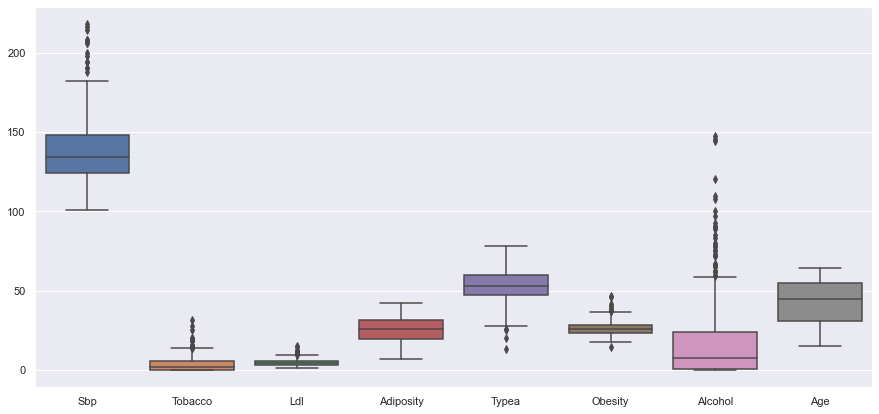

In [21]:
sns.boxplot(data=new_data)

In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
lb=LabelEncoder()
data['Famhist']=lb.fit_transform(data['Famhist'])

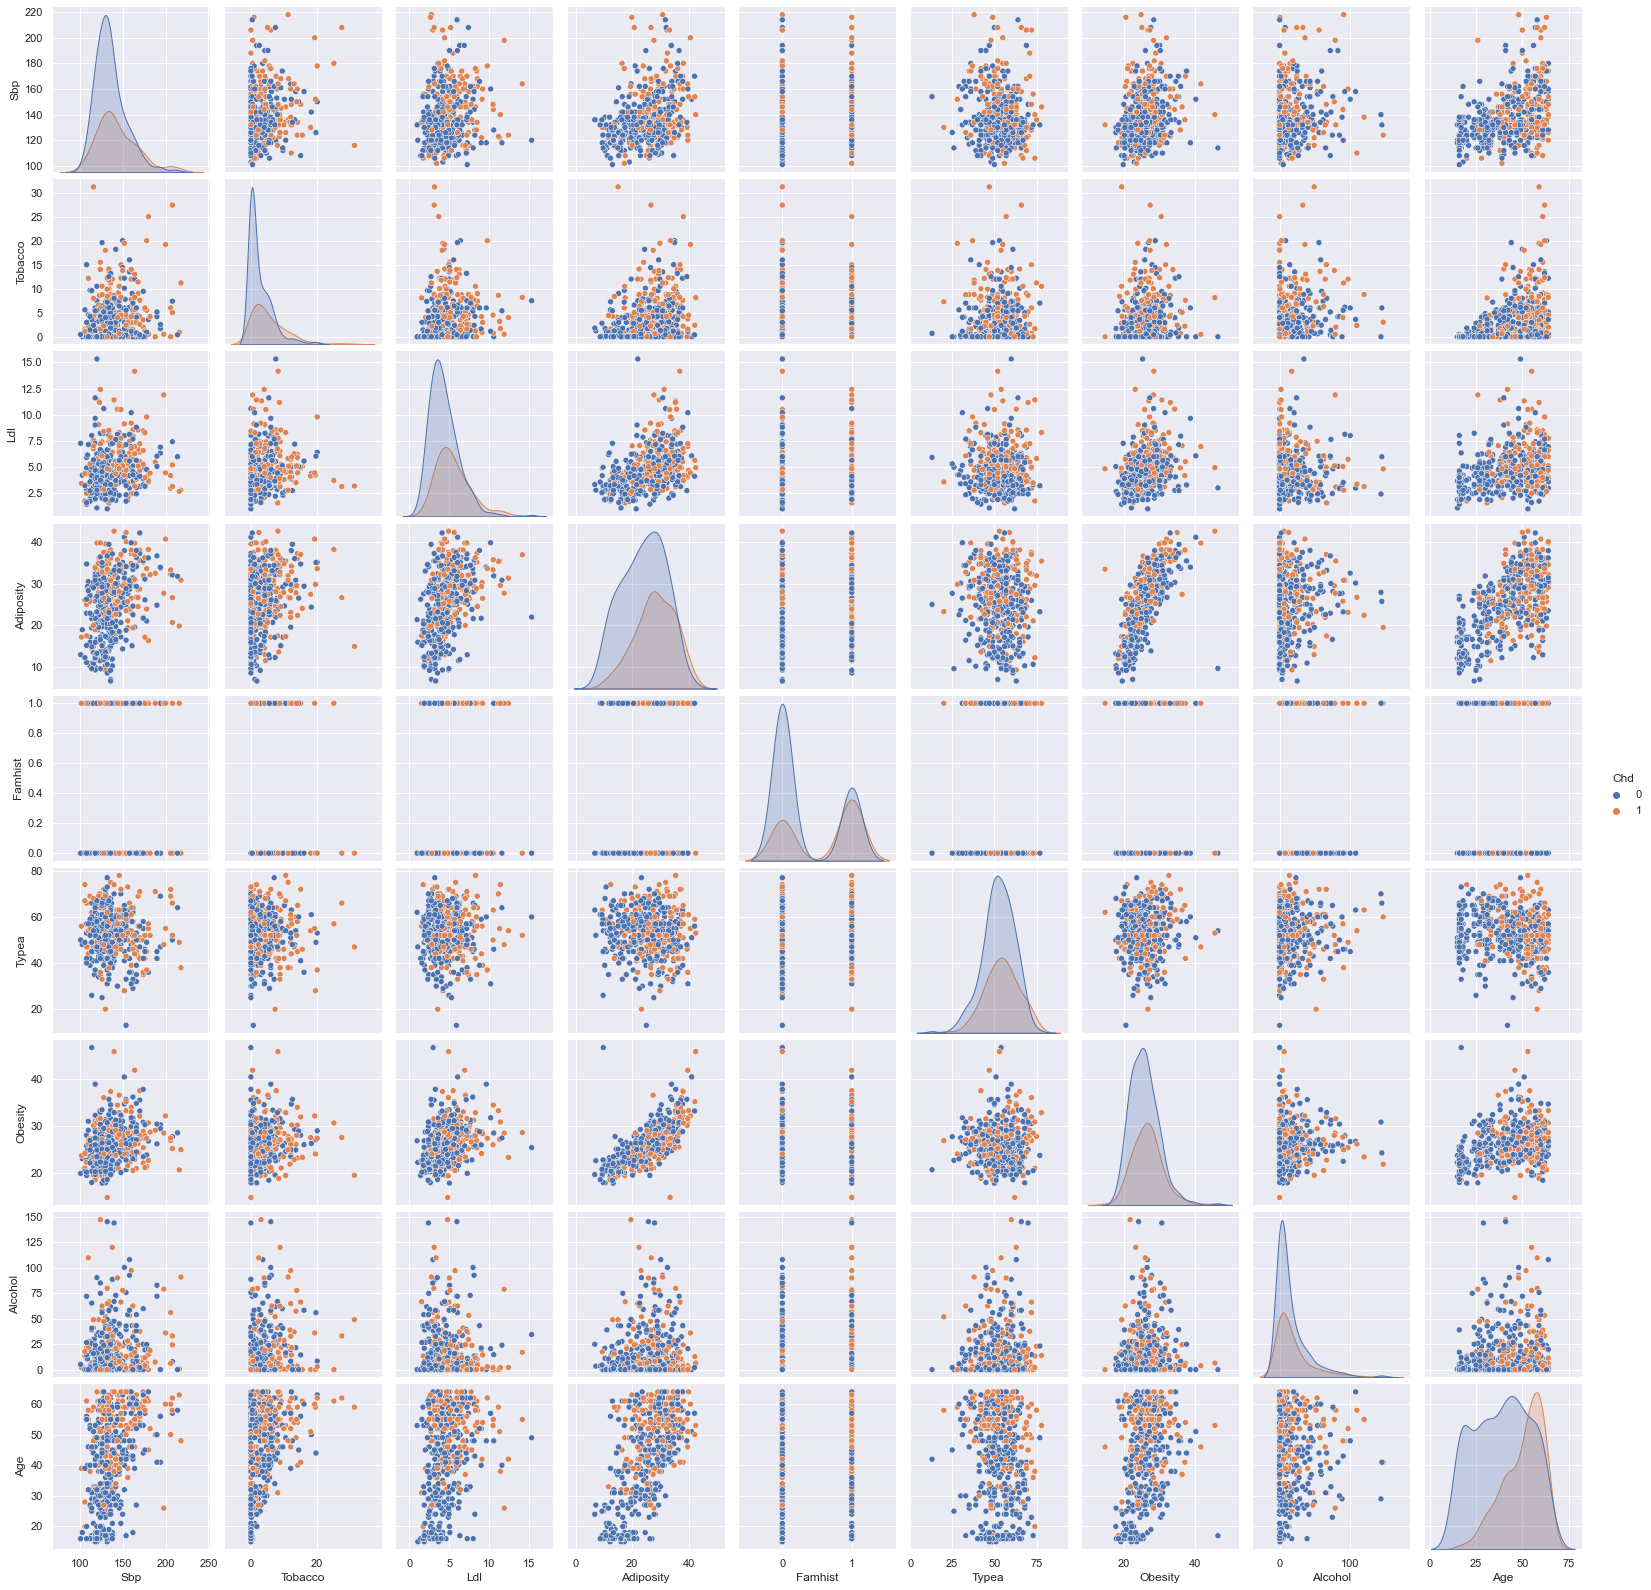

In [26]:
sns.pairplot(data=data,hue='Chd')

<AxesSubplot:>

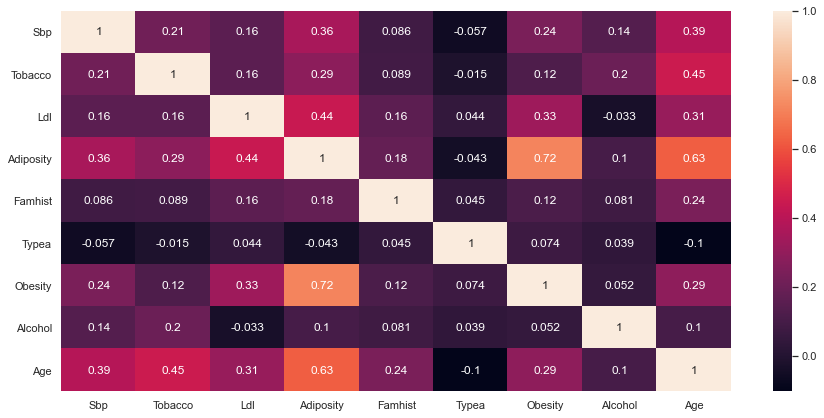

In [27]:
sns.heatmap(data.corr(),annot=True)

In [35]:
corr=data.corr()
corr[(corr>0.5) | (corr <-0.5)].style.background_gradient('magma')

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age
Sbp,1.000000,nan,nan,nan,nan,nan,nan,nan,nan
Tobacco,nan,1.000000,nan,nan,nan,nan,nan,nan,nan
Ldl,nan,nan,1.000000,nan,nan,nan,nan,nan,nan
Adiposity,nan,nan,nan,1.000000,nan,nan,0.716556,nan,0.625954
Famhist,nan,nan,nan,nan,1.000000,nan,nan,nan,nan
Typea,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
Obesity,nan,nan,nan,0.716556,nan,nan,1.000000,nan,nan
Alcohol,nan,nan,nan,nan,nan,nan,nan,1.000000,nan
Age,nan,nan,nan,0.625954,nan,nan,nan,nan,1.000000


In [33]:
for i in data.columns:
    print(i," :",round(data['Chd'].corr(data[i]),4))

Sbp  : 0.1924
Tobacco  : 0.2997
Ldl  : 0.2631
Adiposity  : 0.2541
Famhist  : 0.2724
Typea  : 0.1032
Obesity  : 0.1001
Alcohol  : 0.0625
Age  : 0.373
Chd  : 1.0


### Data Preprocessing

In [36]:
import statsmodels.api as sm

In [37]:
x=data.iloc[:,:-1]
y=data[['Chd']]

In [40]:
numcols=x.select_dtypes(include=['int64','float64']).columns

In [43]:
x[numcols]=x[numcols].apply(zscore)

In [47]:
X=sm.add_constant(x)
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2080
Time:                        19:56:26   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2631      0.165     -7.646      0.000      -1.587      -0.939
Sbp            0.1332      0.117      1.135      0.256      -0.097       0.363
Tobacco        0.3642      0.122      2.984      0.003       0.125       0.603
Ldl            0.3598      0.123      2.915      0.004       0.118       0.602
Adiposity      0.1445      0.228      0.635      0.526      -0.302       0.591
Famhist        0.9254      0.228      4.061      0.000       0.479       1.372
Typea          0.3883      0.121      3.214      0.001       0.151       0.625
Obesity       -0.2648      0.186     -1.422      0.155      -0.630       0.100
Alcohol        0.0030      0.110      0.027      0.978      -0.212       0.218
Age            0.6600      0.177      3.728      0.000       0.313       1.007
==============================================================================
"""

In [48]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
dfs=pd.DataFrame()
dfs['Features']=x.columns
dfs['VIF']=[variance_inflation_factor (x.values,i) for i in range(x.shape[1])]
dfs['VIF']=round(dfs['VIF'],2)
dfs.sort_values(by='VIF',ascending=False)

,Features,VIF
3,Adiposity,3.59
6,Obesity,2.29
8,Age,2.17
1,Tobacco,1.30
2,Ldl,1.27
0,Sbp,1.23
7,Alcohol,1.07
4,Famhist,1.05
5,Typea,1.04


##### Since the VIF values are within the acceptable range we can accept some for of correlation 

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [60]:
sm=SMOTE()
X_train_sm,Y_train_sm=sm.fit_resample(x_train,y_train)

In [62]:
log=LogisticRegression()
log.fit(X_train_sm,Y_train_sm)

LogisticRegression()

In [63]:
print(log.score(X_train_sm,Y_train_sm))
print(log.score(x_test,y_test))

0.6794258373205742
0.7122302158273381


In [64]:
yhat_log=log.predict(x_test)
metrics.confusion_matrix(y_test,yhat_log)

array([[70, 23],
       [17, 29]], dtype=int64)

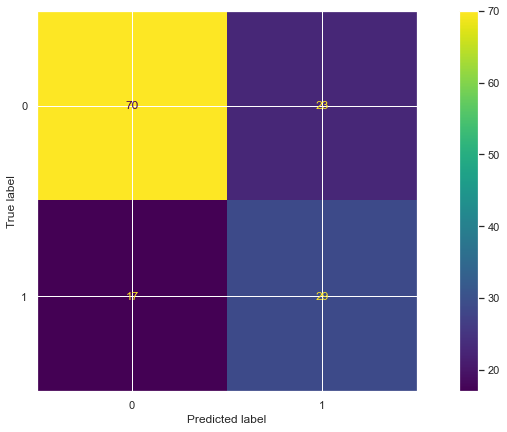

In [66]:
metrics.plot_confusion_matrix(log,x_test,y_test)

AUC:  0.7653108929406266
Threshold : 0.5271694554998061


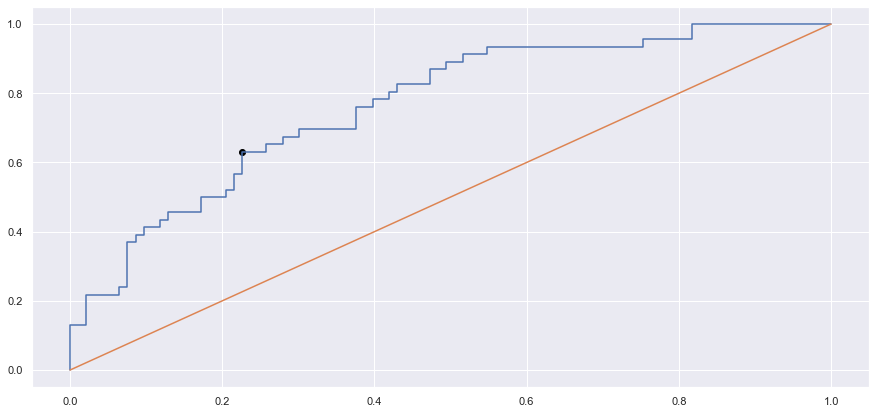

In [72]:
yhat_prob=log.predict_proba(x_test)
FPR,TPR,Th=metrics.roc_curve(y_test,yhat_prob[:,1])
plt.plot(FPR,TPR)
plt.plot([0,1])
print('AUC: ',metrics.auc(FPR,TPR))
Gmeans=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmeans)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Threshold :",Th[mx])

In [73]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(X_train_sm,Y_train_sm)
yhat_dt=dt.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_dt))

[[49 44]
 [ 7 39]]


In [74]:
print(metrics.classification_report(y_test,yhat_dt))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66        93
           1       0.47      0.85      0.60        46

    accuracy                           0.63       139
   macro avg       0.67      0.69      0.63       139
weighted avg       0.74      0.63      0.64       139



AUC:  0.7570126227208976
Threshold : 0.6037735849056604


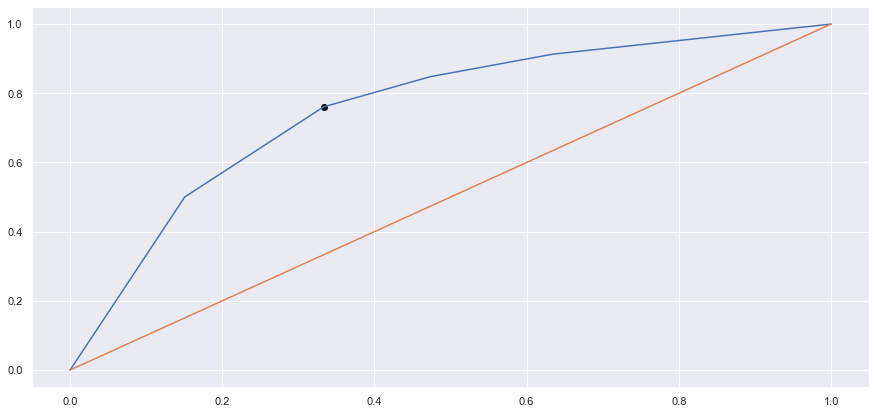

In [75]:
yhat_prob=dt.predict_proba(x_test)
FPR,TPR,Th=metrics.roc_curve(y_test,yhat_prob[:,1])
plt.plot(FPR,TPR)
plt.plot([0,1])
print('AUC: ',metrics.auc(FPR,TPR))
Gmeans=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmeans)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Threshold :",Th[mx])

In [76]:
rt=RandomForestClassifier(criterion='entropy', max_depth=3)
rt.fit(X_train_sm,Y_train_sm)
yhat_rt=dt.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_rt))

[[49 44]
 [ 7 39]]


In [77]:
print(metrics.classification_report(y_test,yhat_rt))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66        93
           1       0.47      0.85      0.60        46

    accuracy                           0.63       139
   macro avg       0.67      0.69      0.63       139
weighted avg       0.74      0.63      0.64       139



AUC:  0.7564282374941561
Threshold : 0.4873310463761569


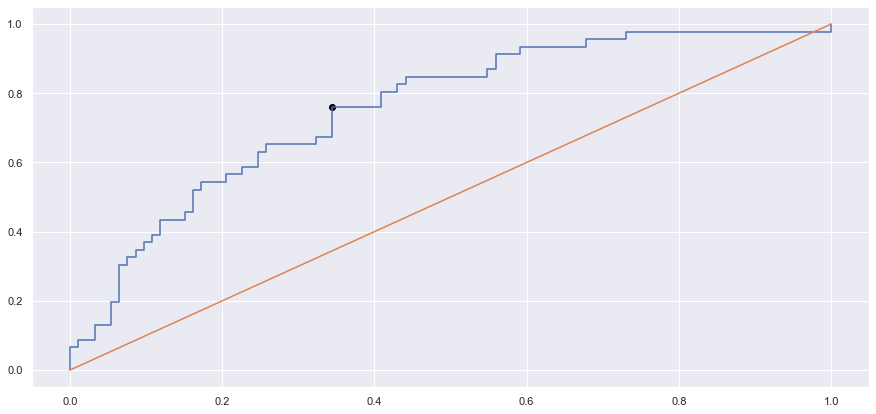

In [78]:
yhat_prob=rt.predict_proba(x_test)
FPR,TPR,Th=metrics.roc_curve(y_test,yhat_prob[:,1])
plt.plot(FPR,TPR)
plt.plot([0,1])
print('AUC: ',metrics.auc(FPR,TPR))
Gmeans=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmeans)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Threshold :",Th[mx])

In [80]:
ada=AdaBoostClassifier()
ada.fit(X_train_sm,Y_train_sm)
yhat_ada=dt.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_ada))

[[49 44]
 [ 7 39]]


In [81]:
print(metrics.classification_report(y_test,yhat_ada))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66        93
           1       0.47      0.85      0.60        46

    accuracy                           0.63       139
   macro avg       0.67      0.69      0.63       139
weighted avg       0.74      0.63      0.64       139



AUC:  0.7162225338943431
Threshold : 0.4941134434079732


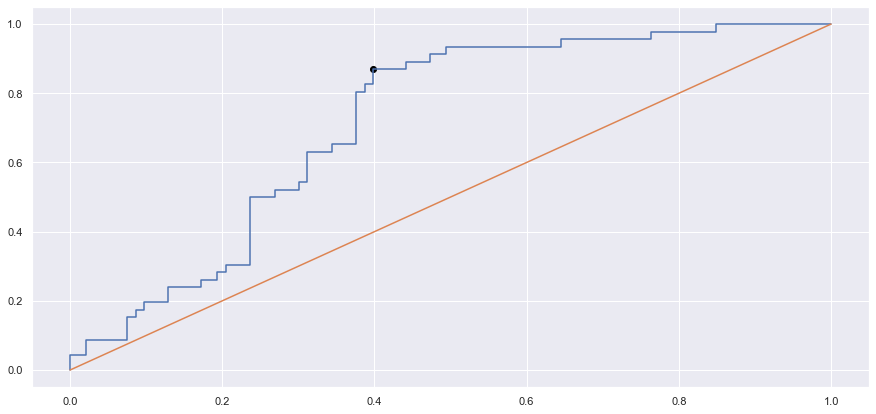

In [82]:
yhat_prob=ada.predict_proba(x_test)
FPR,TPR,Th=metrics.roc_curve(y_test,yhat_prob[:,1])
plt.plot(FPR,TPR)
plt.plot([0,1])
print('AUC: ',metrics.auc(FPR,TPR))
Gmeans=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmeans)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Threshold :",Th[mx])

In [83]:
from xgboost import XGBClassifier

In [85]:
xg=XGBClassifier()
xg.fit(X_train_sm,Y_train_sm)
yhat_xg=xg.predict(x_test)
print(metrics.classification_report(y_test,yhat_xg))
print(metrics.confusion_matrix(y_test,yhat_xg))

[21:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        93
           1       0.45      0.43      0.44        46

    accuracy                           0.64       139
   macro avg       0.59      0.59      0.59       139
weighted avg       0.64      0.64      0.64       139

[[69 24]
 [26 20]]
